# Métriques pièges et chaines de traitement en machine learning

* [A. Métriques](#a-usage-des-métriques)
    * [A.1. Exploitation des métriques de scikit-learn](#a1-utiliser-les-métriques-scikit-learn)
    * [A.2. Données déséquilibrées, courbe ROC](#a2-cas-déséquilibré-biais-et-courbe-roc)
    * [A.3. Agrégation d'indicateurs](#a3-agrégation-dindicateurs)
* [B. Evaluation robuste: validation croisée](#b-fonctions-scikit-learn-avancées--validation-croisée)
    * [B.1. Exemple d'utilisation](#b1-exemples-de-fonctionnement)
    * [B.2. Exercice](#b2-votre-tour)
* [C. Sélection de modèle](#c-sélection-de-modèles)
    * [C.1. Comparaison classique](#c1-processus-classique)
    * [C.2. Procédure automatique: grid-search](#c2-grid-search)
    * [C.3. Exercice](#c3-votre-tour)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Usage d'outils externes

Nous allons continuer à utiliser la méthode `plot_frontiere`... Mais nous allons arrêter de la copier de notebook en notebook. La solution est la suivante:

1. Faire un fichier `.py` avec la méthode
2. [option, mais plus propre] Mettre cette fonction dans un sous-répertoire (=création d'un module)
3. Importer la fonction avec les commandes ci-dessous. 

**ATTENTION** en plus de l'import, il faut ajouter une petite commande astucieuse qui vérifie si le fichier externe a été modifié et recharge le module lorsque c'est nécessaire.

In [4]:
from outils.frontiere import plot_frontiere

%load_ext autoreload
%autoreload 2

## A. Usage des métriques

Toujours se rappeler que la métrique n'est pas nécessairement la fonction optimisée:
1. Spécificités des données et de la tâche $\Rightarrow$ définition de la fonction **cout**/**loss** à optimiser
2. Présentation des résultats à un expert métier  $\Rightarrow$ usage d'une **métrique** parlante

Pour les approches précision/rappel, toujours garder en mémoire la super-illustration wikipedia:

<img src="fig/precision_rappel.png" width = "400px">

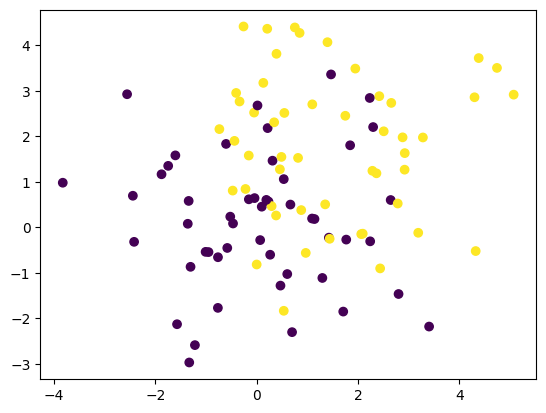

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# données équilibrées (cas simple pour démarrer)
centers = [[0,0], [1.5,1.5]]
clusters_std = [1.5,1.5]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=clusters_std,  n_features=2,   random_state=0) # 100 pts, 2classes, 2dim 
y    = y * 2 -1 # passage des étiquettes sur [-1 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

plt.figure(facecolor='white')
plt.scatter(X[:,0],X[:,1],c=y)

/Users/vguigue/opt/anaconda3/envs/my-torch/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Text(0.5, 1.0, 'SVC Linéaire')

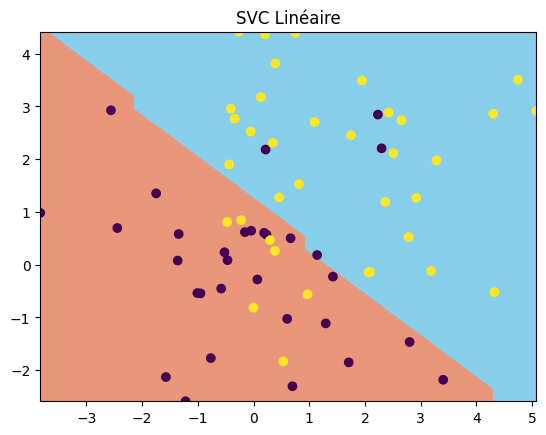

In [6]:
# modèle linéaire 
from sklearn.svm import LinearSVC

mod = LinearSVC()
mod.fit(X_train,y_train)

plt.figure(facecolor='white')
plot_frontiere(X_train, y_train, mod)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('SVC Linéaire')

### A.1 Utiliser les métriques scikit-learn

Utililser les métriques de base (accuracy) pour calculer les taux de bonnes classification en apprentissage et en test: [lien](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)


In [7]:
# Exploitation et affichage des métriques
import sklearn.metrics as met

print("Accuracies (app/test) : ",met.accuracy_score(y_train, mod.predict(X_train)), \
    met.accuracy_score(y_test, mod.predict(X_test)))

Accuracies (app/test) :  0.8507462686567164 0.6363636363636364


1. Calculer la précision et le rappel de chacune des classes
    * Commencer par un appel simple à la fonction: combien de score sont-ils calculés? A quoi correspondent-ils?
    * il est important de noter que la précision et le rappel sont des métriques complémentaires: prises indépendemment, elles sont triviales à maximiser.

1. Calculer le score f1

**Note: à vous de faire les bons import pour accéder aux fonctions**

In [8]:
# import

# calcul des métriques

### <CORRECTION> ###

# précision / rappel
print("precision/rappel (cl1): ", met.precision_score(y_test, mod.predict(X_test)), \
    met.recall_score(y_test, mod.predict(X_test)))
print("precision/rappel (cl0): ", met.precision_score(y_test, mod.predict(X_test),pos_label=-1), \
    met.recall_score(y_test, mod.predict(X_test),pos_label=-1))

# f1
for c in np.unique(y_train):
    print("f1 ","classe:",c, met.f1_score(y_test, mod.predict(X_test),pos_label=c))

### </CORRECTION> ###

precision/rappel (cl1):  0.55 0.7857142857142857
precision/rappel (cl0):  0.7692307692307693 0.5263157894736842
f1  classe: -1 0.625
f1  classe: 1 0.6470588235294117


Afin de vérifier la complémentarité entre précision et rappel, nous allons faire une petite expérience:

1. Construire une prédiction (directement en numpy) ne contenant que des 1 (ou des -1)

1. Calculer les scores de précision et de rappel par rapport à la vérité terrain: est ce que ça correspond à votre intuition?

In [9]:
# construire une prédiction absurde:

yhat_unif = np.ones(len(y_test))

# appel des métriques

# précision / rappel
print("precision/rappel (cl1): ", met.precision_score(y_test, yhat_unif), \
    met.recall_score(y_test, yhat_unif))
print("precision/rappel (cl0): ", met.precision_score(y_test, yhat_unif,pos_label=-1), \
    met.recall_score(y_test, yhat_unif,pos_label=-1))

precision/rappel (cl1):  0.42424242424242425 1.0
precision/rappel (cl0):  0.0 0.0


/Users/vguigue/opt/anaconda3/envs/my-torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Affichage avancé:

1. Calculer et afficher la matrice de confusion en identifiant clairement la notion de *VP, FP, VN, FN* (ie Vrais Positifs, Faux Positifs, Vrais Négatifs, Faux Négatifs).
    * Bonus: afficher la matrice avec `imshow` puis ajouter les effectifs sur la figure [il existe aussi une fonction pour le faire directement]

    <img src="fig/confmat2.png">



In [ ]:
# Ensuite, il faut contnuer:
# - matrice de confusion  (calculer avec la métrique pui utiliser 
# la fonction ConfusionMatrixDisplay pour l'affichage)

### <CORRECTION> ###

matconf = met.confusion_matrix(y_train, mod.predict(X_train))
# plt.figure(facecolor='white')
disp = met.ConfusionMatrixDisplay(confusion_matrix=matconf, display_labels = np.unique(y_train))
disp.plot()
plt.gcf().set_facecolor('white')
#plt.savefig("fig/confmat.png")



### </CORRECTION> ###

### <span style="color:red"> Exo </span> Calculer la précision et le rappel sur USPS

Pour chaque classe de données, calculer la précision et le rappel.

Interpréter rapidement les résultats

In [ ]:
# Chargement des données
import pickle as pkl
data = pkl.load(open("data/usps.pkl",'rb')) 
# data est un dictionnaire contenant les champs explicites X_train, X_test, Y_train, Y_test
X_train = np.array(data["X_train"],dtype=float) # changement de type pour éviter les problèmes d'affichage
X_test = np.array(data["X_test"],dtype=float)
Y_train = data["Y_train"]
Y_test = data["Y_test"]


In [ ]:
# modèle (au choix) et métrique

### Evaluation avancée

L'idée est maintenant d'évaluer l'ensemble des variations d'un classifieur en précision et rappel

1. On apprend un classifieur

1. Le système va faire varier le biais du classifieur, calculer les précisions et rappels puis stocker les résultats.

    Comment interpréter la figure suivante?

    <img src="fig/precrapp2.png">
    
    * Prenez la place d'un donneur d'ordre: comment exploiter cette courbe au niveau industriel? Mini-exo à suivre.
**Note: à vous de faire les bons import pour accéder aux fonctions**


f1  classe: -1 0.625
f1  classe: 1 0.6470588235294117


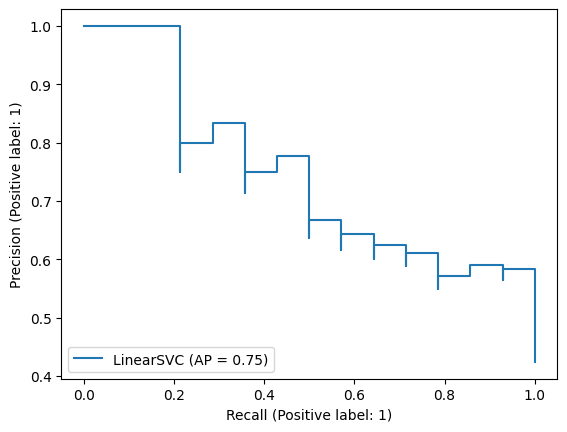

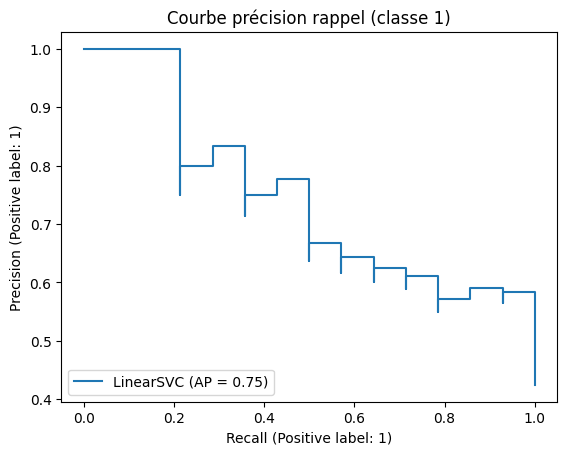

In [ ]:



# Courbe de compromis précision/rappel (utiliser la fonction PrecisionRecallDisplay.from_estimator)
# 
### <CORRECTION> ###



# all précision / rappel

disp = met.PrecisionRecallDisplay.from_estimator(mod,X_test,y_test)
disp.plot()
plt.title('Courbe précision rappel (classe 1)')
plt.gcf().set_facecolor('white')

# plt.savefig("fig/precrapp.png")

# f1
for c in np.unique(y_train):
    print("f1 ","classe:",c, met.f1_score(y_test, mod.predict(X_test),pos_label=c))

### </CORRECTION> ###
    

### <span style="color:red"> Mini-exo </span> Interprétation de la précision et du rappel

En imaginant dans le problème précédent que la classe -1 correspond à une situation normale et la classe +1 à une alarme. Utiliser la figure précédente pour répondre aux questions suivantes:

1. Si je ne tolère aucune fausse alerte, quelle couverture puis-je espérer avec cet estimateur?
2. Si je veux une couverture de 100% des alarmes, quel taux de fausse alerte vais-je avoir?

Réponse:


### A.2. Cas déséquilibré, biais et courbe ROC

Attention, dans la suite, on se place dans le cas où la classe minoritaire est la classe d'intérêt (fraude, alarme, anomalie, ...) et on va parler de **détection correcte (=VP vrai positif=TP true positive)** et de **fausse alarme (=FP faux positif/False Positive)**.

1. La génération des données est fournie
1. Ajouter le calcul du score en accuracy 

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(42)
# données déséquilibrées
centers = [[0,0], [1.5, 1.5]]
clusters_std = [1.5, 0.75]
X, y = make_blobs(n_samples=[200,15], centers=centers, cluster_std=clusters_std,  n_features=2,   random_state=0) # 100 pts, 2classes, 2dim 
y    = y * 2 -1 # passage des étiquettes sur [-1 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

plt.figure(facecolor='white')
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid()
# plt.savefig("fig/unbalanced.pdf")

In [ ]:
# modèle linéaire 
from sklearn.svm import LinearSVC

mod = LinearSVC(dual='auto')
mod.fit(X_train,y_train)

plt.figure()
plot_frontiere(X_train, y_train, mod)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('SVC Linéaire')
# plt.savefig("fig/unbalanced_dec.pdf")

# Ajouter le score en accuracy (en anticipant le résultat):
### <CORRECTION> ###
print('Performances en accuracy (test): ', met.accuracy_score(y_test, mod.predict(X_test)))
### </CORRECTION> ###

Ce résultat illustre la difficulté à traiter des données deséquilibrées... Heureusement, il y une première solution simple pour obtenir des résultats:
    * on peut décaler la frontière de décision jusqu'à ce qu'un point bascule dans la classe des détectés.
    * Puis itérer le processus jusqu'à ce que 100% des points cibles soient détectés
    * Cet ensemble de classifieur correspond à autant d'évaluations...
        * On retrouve la courbe précision-rappel vue précédemment
        * Et on en profite pour introduire la **courbe ROC** [lien](https://fr.wikipedia.org/wiki/Courbe_ROC) qui trace les TP en fonction des FP
    $$\text{Soit } X,Y : \forall b_i \in [\hat y_{max},\ \hat y_{min}] \text{ calculer } score(f(X)+b_i,Y) $$

> Courbe ROC = mesure de la capacité à détecter les évènements sans rajouter de bruit en faisant varier la sensibilité

<img src="fig/roc_anim3.gif">

**Note:** Pour obtenir l'animation facilement, on sauvegarde les images intermédiaires et on passe par un site de création de GIF comme [ezgif](https://ezgif.com/maker/)

Etape 1: jouons avec la courbe ROC

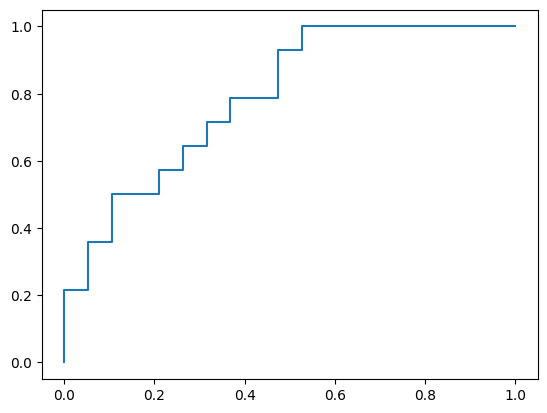

In [12]:
# 1. Dans mon problème, calcul de la valeur de sortie du classifieur

yhat = X_test @ mod.coef_.reshape(-1,1)

# 2. Récupération de tous les seuils de coupures associés 
# aux taux de vrais positif ou faux positif

fpr, tpr, thresholds = met.roc_curve(y_test, yhat, pos_label=1)

# tracé de la courbe ROC

plt.figure()
plt.plot(fpr,tpr)


Etape 2 : faire varier la fonction à la main + tracer la courbe ROC en détails

<span style="color:red"> **CETTE QUESTION EST DIFFICILE, ON PEUT LA TRAITER EN FIN DE SEANCE, ELLE N'EST PAS BLOCANTE POUR LA SUITE** </span>

In [ ]:
# fabrication d'une courbe ROC

# 1. Calcul des scores des points de test:
yhat = mod.decision_function(X_test) # ATTENTION, la fonction de score continue dépend du classifieur
                                     # seule la fonction de prédiction de classe discrète est générique

# 2. Vérification de l'uniformité des scores: tout le monde est dans la même classe...
# => 0 détection
print(yhat)
plt.figure()
plt.bar(np.arange(len(yhat)), yhat)
plt.grid()


In [ ]:
# 3. On applique l'idée clé: 
#   a. décaler la frontière (en fonction des valeurs de yhat)
#   b. calculer le score du nouveau classifieur

TP = [0.] # listes des effectifs True Positive
FP = [0.] # listes des effectifs False Positive
ACC = [np.where((y_test*yhat>0),1,0).mean()] # controle sur le taux de bonne classification générale

# position initiale (0,0): 0 détecté, 0 fausse détection

nb_evt    = np.where((y_test>0),1,0).sum()  # pour normaliser les TP entre 0 et 1
nb_max_fp = np.where((y_test<=0),1,0).sum() # pour normaliser les FP entre 0 et 1

plt.figure(figsize=[15,5])

# détermination des valeurs de biais à tester
values = np.sort(-yhat[y_test>0]) # toutes les valeurs qui permettent de faire une détection de plus
values = np.insert(values, 0, 0) # la valeur extrême pour laquelle tous les points sont détectés
values = np.append(values, - yhat.min()) # la valeur extrême pour laquelle tous les points sont détectés

# boucle sur les biais
for i,b in enumerate(values): # evolution du biais b
    # 1. Décaler yhat (dans une nouvelle variable)
    # 2. calculer TP, FP et accuracy
    # 3. faire les affichages
    #    - c'est un peu long... Pas besoin de peaufiner (réglage des axes...)

    ### <CORRECTION> ###

    y_tmp = yhat + b + 1e-6 
    # print(y_tmp)
    tp    = np.where((y_tmp>0) & (y_test>0),1,0).sum()  /nb_evt # taux bonne détection
    fp    = np.where((y_tmp>0) & (y_test<=0),1,0).sum() /nb_max_fp # fausse détection
    acc   = np.where((y_test*y_tmp>0),1,0).mean()

    TP.append(tp)
    FP.append(fp)
    ACC.append(acc)
    #print(FP,TP)

    plt.clf()
    plt.subplot(1,3,1)
    plot_frontiere(X_test, y_test, mod, biais=b)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
    plt.title('SVC Linéaire b='+str(b))

    plt.subplot(1,3,2)
    plt.plot(FP,TP)   
    plt.scatter(FP[-1],TP[-1])
    plt.axis([0.,1.,0.,1.05])
    plt.grid()
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('ROC')

    plt.subplot(1,3,3)
    plt.plot(ACC)
    plt.scatter(i+1,ACC[-1])
    plt.grid()
    plt.axis([0,len(values),0,1])
    plt.title('Tx bonne classification')

    # plt.savefig('fig/anim/roc_'+str(i)+'.png')

    ### </CORRECTION> ###




In [ ]:
### <CORRECTION> ###
from turtle import color
from matplotlib.path import Path
from matplotlib.patches import PathPatch

fpr, tpr, thresholds = met.roc_curve(y_test, yhat, pos_label=1)
sc = met.auc(fpr, tpr)

plt.figure(facecolor='white')
plt.plot(FP,TP,lw=3,c='b')   
FP.append(1)
TP.append(0)
path = Path(np.array([FP,TP]).transpose())
patch = PathPatch(path,color='b', alpha=0.5)
plt.gca().add_patch(patch)

plt.axis([0.,1.,0.,1.05])
plt.grid()
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC => AUC = {:4.2f}'.format(sc))
#plt.savefig('fig/auc.png')


plt.figure(facecolor='white')
disp = met.PrecisionRecallDisplay.from_estimator(mod,X_test,y_test)
disp.plot()
plt.title('Courbe précision rappel (classe 1)')
# plt.savefig("fig/precrappU.png")

### </CORRECTION> ###

### A.3. Agrégation d'indicateurs

Les data-scientistes ont horreur de manipuler différents indicateurs: pour fusionner **précision** et **rappel**, on a calculé le **f1-score**. Evidemment, la courbe ROC pose problème: il s'agit d'une liste de score difficile à expliquer aux experts métier.

Pour la courbe ROC, l'idée est de calculer l'aire sous la courbe (**AUC: Area Under the Curve**): 
- plus la courbe passe *en haut à gauche*, plus l'aire couverte est grande (i.e. on a bien détecter les évènements sans ajouter de bruit) $\Rightarrow$ l'aire tend vers 1
- plus la courbe passe *sur la diagonale*, plus l'aire couverte est petite (i.e. à chaque mouvement, on ajoute autant de détection que de bruit) $\Rightarrow$ l'aire tend vers 0.5

<img src="fig/auc.png">

Pour l'implémentation, il suffit de se référer à l'exemple donné ici: [lien](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

In [ ]:
# Calculer l'indicateur AUC correspondant au problème précédent:
# 1. Reprendre les calculs de fpr, tpr de la courbe ROC
# 2. Trouver la fonction auc qui calcule l'aire sous la courbe

### <CORRECTION> ###
fpr, tpr, thresholds = met.roc_curve(y_test, yhat, pos_label=1)
sc = met.auc(fpr, tpr)
print("auc: ", sc)

### </CORRECTION> ###

## B. Fonctions scikit-learn avancées : validation croisée

On a déjà vu ci-dessus les fonctions de séparation d'un jeu de données en apprentissage et test: cette fonction marche très bien dans la plupart des cas.

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)`


Cette section explique comment passer à la validation croisée dans le cas où les données ne sont pas disponibles en quantité suffisante.


Nous avons testé différentes fonctions permettant le calcul des métriques usuelles en machine learning. Mais nous n'avons pas encore abordé le problème de la validation croisée. 2 principales solutins sont proposées dans scikit-learn:
1. Boucle `for`:
    * Séparation des données 
    * Apprentissage
    * Evaluation sur les données de test
2. Lancement d'une fonction effectuant toutes les opérations (et retournant les scores en test)
    * Rapide, pratique
    * Facilement parallélisable (cf `njob`)
    * Non adapté quand on veut avoir la main sur les données intermédiaires.

**Note:** afin d'être robuste au cas déséquilibré, il est plus efficace de prendre les options `stratified` qui garantissent la même répartition des classes en apprentissage et en test.


### B.1. Exemples de fonctionnement


In [ ]:
# Génération des données
centers = [[0,0], [1.5,1.5]]
clusters_std = [1.5,1.5]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=clusters_std,  n_features=2,   random_state=0) # 100 pts, 2classes, 2dim 
y    = y * 2 -1 # passage des étiquettes sur [-1 1]

plt.figure(facecolor='white')
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Solution 1

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

n_fold = 5

skf = StratifiedKFold(n_splits=n_fold) # Objet validation croisée stratifiée

allp = []
for train, test in skf.split(X, y): # récupération des indexs
    mod = SVC()
    mod.fit(X[train],y[train])
    yhat = mod.predict(X[test])
    perf = accuracy_score(yhat,y[test])
    allp.append(perf)
    print('perf : ', perf)

print('Estimation moyenne : ',np.mean(allp))


In [ ]:
# Solution 2
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# définition du modèle
mod = SVC()
n_fold = 5

scores = cross_val_score(mod, X, y, cv=n_fold, scoring='accuracy') # tout est caché dedans :)
print(scores)

### B.2. Votre tour

Sur ces données jouets, calculer la performance en validation croisée d'un modèle bayesien naïf, d'un SVM linéaire et d'une forêt aléatoire. Sélectionner le modèle le plus performant.

**Note:** on se limite aux modèles avec les paramètres par défaut. [la solution est donc très courte]

### B.3 Résultats significatifs

Savoir si un modèle est meilleur qu'un autre n'est pas si simple... Distinguons néanmoins très grossièrement 3 cas de figure:

1. Très peu de données (<50), potentiellement avec de nombreuses classes ou en régression: le problème est dur et nécessite une approche statistique très solide.
2. Beaucoup de données (>10000) et éventuellement peu de classe (e.g. MNIST): le problème est très simple... La moindre amélioration à $10^-2$ en accuracy est souvent significative. 
3. Le cas intermédiaire... Jeu de taille moyenne. Dans ce cas, on peut directement utiliser une fonction toute faite (!): `paired_ttest_kfold_cv`. Un tuto très simple est illustré ici: [lien](https://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_kfold_cv/)

Comparer les résultats SVC/Naive Bayes et tester la sifnificativité des résultats:

In [ ]:
# si nécessaire
%pip install mlxtend

In [ ]:
from mlxtend.evaluate import paired_ttest_kfold_cv

# 

## C. Sélection de modèles 

L'idée est à la fois de trouver la meilleure classe de modèle (déjà fait ci-dessus)... Mais aussi les paramères optimaux des modèles. Le terme **sélection de modèle** regroupe les deux problématiques.

### C.1. Processus classique

1. Liste des modèles
2. Evaluation

**Note:** on peut utiliser la validation croisée si on manque de données ou une procédure plus simple si la masse est suffisante.

**Note 2:** globalement, le processus est très proche de la section précédente...


In [ ]:
#Data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# données déséquilibrées
centers = [[0,0], [1.5,1.5]]
clusters_std = [1.5,1.5]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=clusters_std,  n_features=2,   random_state=0) # 100 pts, 2classes, 2dim 
y    = y * 2 -1 # passage des étiquettes sur [-1 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


param = [0.01, 0.05, 0.1, 0.5, 1, 5 ]
allp = []
plt.figure(facecolor='white', figsize=[4*len(param),4])

for i,gam in enumerate(param):
    mod = SVC(gamma=gam)
    mod.fit(X_train,y_train)
    yhat = mod.predict(X_test)
    perf = accuracy_score(yhat,y_test)
    allp.append(perf)

    # affichage 
    plt.subplot(1,len(param),i+1)
    plot_frontiere(X,y,mod)
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
    plt.title('SVC $\gamma=${}, perf={:.2f}'.format(gam,perf))

### C.2. Grid Search

Ce que l'on a fait ci-dessus à la main correspond à ce que les data-scientists nomment *grid-search*: recherche de valeur(s) optimale(s) sur un axe, ou une grille lorsqu'on est plusieurs paramètres.

Le code ci-dessous envisage deux cas de figure:

1. Reproduction de l'exemple précédent (recherche sur un axe) avec une fonction plus efficace
    * paramètre $\gamma$ du noyau gaussien dans un SVM
1. Recherche sur deux axes (=grille) =>  TODO
    * paramètre $\gamma$ + paramètre de régularisation



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#

**Note:** la documentation est importante. Il est possible de définir partiellement des grilles lorsque les combinaisons de certains paramètres n'ont pas de sens.

In [ ]:
# Cas 1: recherche sur un axe
from sklearn.model_selection import GridSearchCV

# définition du modèle générique
mod = SVC()
# dictionnaire: key = nom du paramètre dans le classifieur
parameters = {'gamma' : [0.01, 0.05, 0.1, 0.5, 1, 5 ]}
meta_mod = GridSearchCV(estimator=mod, param_grid=parameters, cv=3)
meta_mod.fit(X_train,y_train) # la validation croisée va être effectuée sur les données de train
print(meta_mod.cv_results_.keys()) # pour voir ce qui est disponible

# exploration
print(meta_mod.cv_results_['mean_test_score'])
print(meta_mod.cv_results_['params'])

### C.3. Votre tour

1. Ajouter une recherche de paramètre de régularisation sur le problème précédent. vous devez obtenir une figure comme celle ci-dessous:

<img src ='fig/gridsearch.png'>

2. [@home] Trouver les paramètres optimaux d'une forêt aléatoire (nombre d'arbres et profondeur) pour ce problème

In [ ]:
# cas 2: recherche sur 2 axes
# Jouer avec les paramètres de régularisation en plus du réglage de gamma

### <CORRECTION> ###
mod = SVC()
# dictionnaire: key = nom du paramètre dans le classifieur
parameters = {'C' : [0.001,0.1, 1, 10, 100, 1000],'gamma' : [0.001,0.01, 0.05, 0.1, 0.5, 1, 5 ]}
meta_mod = GridSearchCV(estimator=mod, param_grid=parameters, cv=3)

meta_mod.fit(X_train,y_train) # la validation croisée va être effectuée sur les données de train
print(meta_mod.cv_results_.keys()) # pour voir ce qui est disponible

# exploration
print(meta_mod.cv_results_['mean_test_score'])
print(meta_mod.cv_results_['params'])
### </CORRECTION> ###

# Identifier les paramètres optimaux + tracé des performances
from matplotlib import cm

acc = np.array(meta_mod.cv_results_['mean_test_score'])

plt.figure(facecolor='white')

plt.imshow(acc.reshape(len(parameters['C']), len(parameters['gamma'])),cmap=cm.coolwarm)
plt.ylabel('C')
plt.yticks(np.arange(len(parameters['C'])), parameters['C'])
plt.xlabel('gamma')
plt.xticks(np.arange(len(parameters['gamma'])), parameters['gamma'])
plt.colorbar()

# plt.savefig('fig/gridsearch.png')

In [ ]:
# Vérification de la cohérence du graphique ci-dessus
print([(p,a) for p,a in zip(meta_mod.cv_results_['params'],meta_mod.cv_results_['mean_test_score'])])

In [1]:
### <CORRECTION> ###
import re
# transformation de cet énoncé en version étudiante

fname = "2-notebook-metrique-corr.ipynb" # ce fichier
fout  = fname.replace("-corr","")

# print("Fichier de sortie: ", fout )

f = open(fname, "r")
txt = f.read()

f.close()


f2 = open(fout, "w")
f2.write(re.sub("<CORRECTION>.*?(</CORRECTION>)"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

### </CORRECTION> ###